<a href="https://colab.research.google.com/github/enriquejujuy/IPDI/blob/main/IPDI_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TP 3  Operaciones de luminancia**
# **CHOQUE Enrique Aniceto**

Cargar una imagen

In [4]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

Cargamos la imagen

(256, 256, 3)
float64


<ipython-input-49-feaf9c0c638f>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=np.clip(imageio.imread('/content/Imagen/Img_oscura.bmp')/255,0,1)


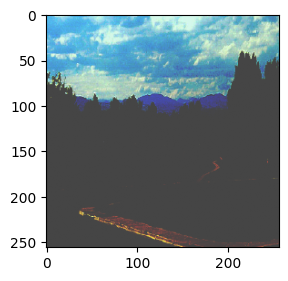

In [49]:
img=np.clip(imageio.imread('/content/Imagen/Img_oscura.bmp')/255,0,1)

print(img.shape)
print(img.dtype)
plt.figure(figsize=(3, 5))  # Ajusta el tamaño de la figura
plt.imshow(img)
plt.show()

Funcion para transformar RGB a YIQ

In [50]:
# prompt: crear funcion para pasar de RGB a YIQ una imagen

def rgb_to_yiq(img_rgb):
  """Convierte una imagen RGB a YIQ.

  Args:
    img_rgb: Una matriz NumPy que representa una imagen RGB.

  Returns:
    Una matriz NumPy que representa la imagen en el espacio de color YIQ.
  """

  r, g, b = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
  y = 0.299 * r + 0.587 * g + 0.114 * b
  i = 0.596 * r - 0.275 * g - 0.321 * b
  q = 0.212 * r - 0.523 * g + 0.311 * b
  img_yiq = np.stack((y, i, q), axis=-1)
  return img_yiq


Pasamos del espacio RGB  a YIQ

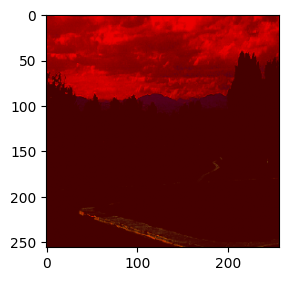

In [51]:

img_yiq = rgb_to_yiq(img)

# Puedes mostrar la imagen en YIQ si lo deseas:
plt.figure(figsize=(3, 5))
plt.imshow(img_yiq)
plt.show()


Histograma

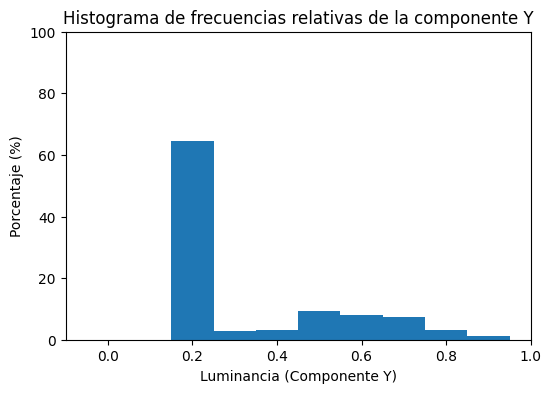

In [52]:

# Obtener la componente Y de la imagen YIQ
Y = img_yiq[:, :, 0]

# Crear el histograma con 10 columnas
hist, bins = np.histogram(Y.flatten(), bins=10, range=(0, 1))

# Calcular las frecuencias relativas
freq_rel = hist / np.sum(hist)

# Convertir las frecuencias relativas a porcentajes
porcentaje = freq_rel * 100

# Graficar el histograma
plt.figure(figsize=(6, 4))
plt.bar(bins[:-1], porcentaje, width=1/10)
plt.xlabel('Luminancia (Componente Y)')
plt.ylabel('Porcentaje (%)')
plt.title('Histograma de frecuencias relativas de la componente Y')
plt.ylim(0, 100)  # Establecer el rango del eje Y entre 0 y 100
plt.show()


Aplicamos la funcion de Raiz cuadrada a la imagen (para aclarar una imagen oscura)

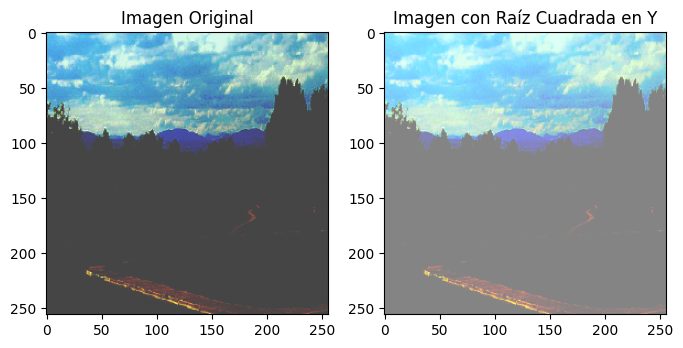

In [57]:

# Aplicar la función raíz cuadrada a la componente Y
Y_raiz = np.sqrt(img_yiq[:, :, 0])

# Asegurarse de que los valores estén en el rango [0, 1]
Y_raiz = np.clip(Y_raiz, 0, 1)

# Reemplazar la componente Y original con la nueva componente Y_raiz
img_yiq_raiz = img_yiq.copy()
img_yiq_raiz[:, :, 0] = Y_raiz


# Convertir la imagen YIQ modificada de vuelta a RGB
def yiq_to_rgb(img_yiq):
  """Convierte una imagen YIQ a RGB.

  Args:
    img_yiq: Una matriz NumPy que representa una imagen YIQ.

  Returns:
    Una matriz NumPy que representa la imagen en el espacio de color RGB.
  """
  y, i, q = img_yiq[:, :, 0], img_yiq[:, :, 1], img_yiq[:, :, 2]
  r = y + 0.956 * i + 0.621 * q
  g = y - 0.272 * i - 0.647 * q
  b = y - 1.106 * i + 1.703 * q
  img_rgb = np.stack((r, g, b), axis=-1)
  return np.clip(img_rgb, 0, 1)


img_rgb_raiz = yiq_to_rgb(img_yiq_raiz)


# Mostrar la imagen original y la imagen con raíz cuadrada
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_raiz)
plt.title('Imagen con Raíz Cuadrada en Y')

plt.show()


Histogramas de imagen original y la imagen con raiz cuadrada

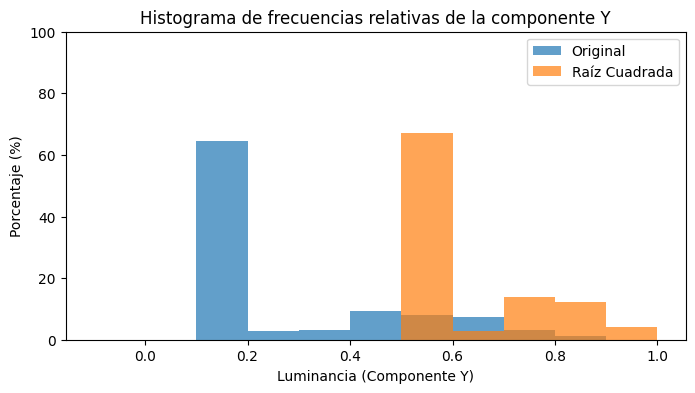

In [59]:

# Obtener la componente Y de la imagen YIQ original y la modificada
Y_original = img_yiq[:, :, 0]
Y_raiz = img_yiq_raiz[:, :, 0]

# Crear los histogramas con 10 columnas para ambas imágenes
hist_original, bins_original = np.histogram(Y_original.flatten(), bins=10, range=(0, 1))
hist_raiz, bins_raiz = np.histogram(Y_raiz.flatten(), bins=10, range=(0, 1))

# Calcular las frecuencias relativas
freq_rel_original = hist_original / np.sum(hist_original)
freq_rel_raiz = hist_raiz / np.sum(hist_raiz)

# Convertir las frecuencias relativas a porcentajes
porcentaje_original = freq_rel_original * 100
porcentaje_raiz = freq_rel_raiz * 100

# Graficar el histograma en una misma línea
plt.figure(figsize=(8, 4))
plt.bar(bins_original[:-1] - 0.05, porcentaje_original, width=0.1, label='Original', alpha=0.7)
plt.bar(bins_raiz[:-1] + 0.05, porcentaje_raiz, width=0.1, label='Raíz Cuadrada', alpha=0.7)

plt.xlabel('Luminancia (Componente Y)')
plt.ylabel('Porcentaje (%)')
plt.title('Histograma de frecuencias relativas de la componente Y')
plt.legend()
plt.ylim(0, 100)  # Establecer el rango del eje Y entre 0 y 100
plt.show()


Convertimos la imagen RGB a bytes y mostramos

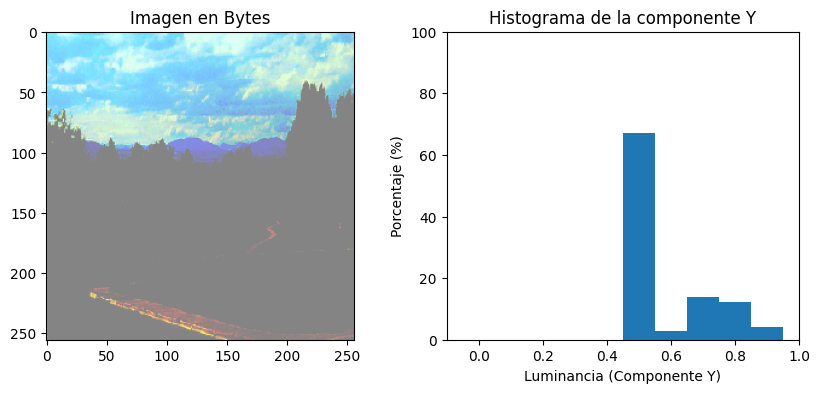

In [62]:

import io
from PIL import Image

def img_to_bytes(img_np):
  """Convierte una imagen numpy a bytes."""
  img = Image.fromarray((img_np * 255).astype(np.uint8))
  img_byte_arr = io.BytesIO()
  img.save(img_byte_arr, format='PNG')
  img_byte_arr = img_byte_arr.getvalue()
  return img_byte_arr


img_rgb_raiz_bytes = img_to_bytes(img_rgb_raiz)


# Obtener la componente Y de la imagen YIQ modificada
Y_raiz = img_yiq_raiz[:, :, 0]

# Crear el histograma con 10 columnas para la imagen modificada
hist_raiz, bins_raiz = np.histogram(Y_raiz.flatten(), bins=10, range=(0, 1))

# Calcular las frecuencias relativas
freq_rel_raiz = hist_raiz / np.sum(hist_raiz)

# Convertir las frecuencias relativas a porcentajes
porcentaje_raiz = freq_rel_raiz * 100


# Mostrar la imagen en bytes y su histograma lado a lado
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

# Mostrar la imagen desde los bytes
image = Image.open(io.BytesIO(img_rgb_raiz_bytes))
plt.imshow(image)
plt.title('Imagen en Bytes')

plt.subplot(1, 2, 2)
plt.bar(bins_raiz[:-1], porcentaje_raiz, width=1/10)
plt.xlabel('Luminancia (Componente Y)')
plt.ylabel('Porcentaje (%)')
plt.title('Histograma de la componente Y')
plt.ylim(0, 100)  # Establecer el rango del eje Y entre 0 y 100
plt.show()


Cargamos una imagen con luminancia alta (muy brillosa)

<ipython-input-63-1a398a8233c5>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=np.clip(imageio.imread('/content/Imagen/luminoso.jpg')/255,0,1)


(880, 1280, 3)
float64


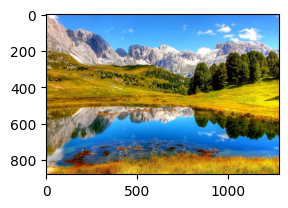

In [63]:
img=np.clip(imageio.imread('/content/Imagen/luminoso.jpg')/255,0,1)

print(img.shape)
print(img.dtype)
plt.figure(figsize=(3, 5))  # Ajusta el tamaño de la figura
plt.imshow(img)
plt.show()

Histograma de la imagen luminosa

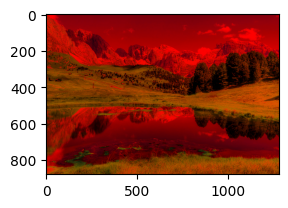

In [65]:
# prompt: transforma la imagen rgb a yiq y normaliza

# Pasamos del espacio RGB  a YIQ
img_yiq = rgb_to_yiq(img)

# Normalizar la componente Y
Y = img_yiq[:, :, 0]
Y_norm = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))

# Reemplazar la componente Y original con la nueva componente Y_norm
img_yiq_norm = img_yiq.copy()
img_yiq_norm[:, :, 0] = Y_norm

# Puedes mostrar la imagen en YIQ si lo deseas:
plt.figure(figsize=(3, 5))
plt.imshow(img_yiq_norm)
plt.show()


Histograma de frecuencias relativas del canal Y

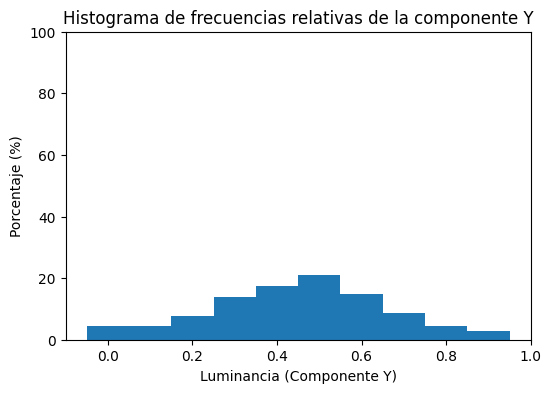

In [66]:
# prompt: histograma de la imagen del canal de luminancia en 10 columnas

# Obtener la componente Y de la imagen YIQ
Y = img_yiq_norm[:, :, 0]

# Crear el histograma con 10 columnas
hist, bins = np.histogram(Y.flatten(), bins=10, range=(0, 1))

# Calcular las frecuencias relativas
freq_rel = hist / np.sum(hist)

# Convertir las frecuencias relativas a porcentajes
porcentaje = freq_rel * 100

# Graficar el histograma
plt.figure(figsize=(6, 4))
plt.bar(bins[:-1], porcentaje, width=1/10)
plt.xlabel('Luminancia (Componente Y)')
plt.ylabel('Porcentaje (%)')
plt.title('Histograma de frecuencias relativas de la componente Y')
plt.ylim(0, 100)  # Establecer el rango del eje Y entre 0 y 100
plt.show()


Aplicamos la funcion cuadratica a una imagen muy luminosa (para bajar la luminancia)

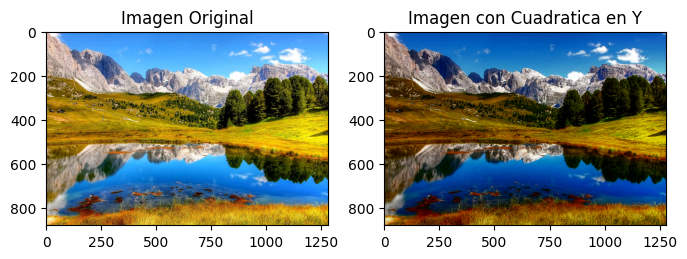

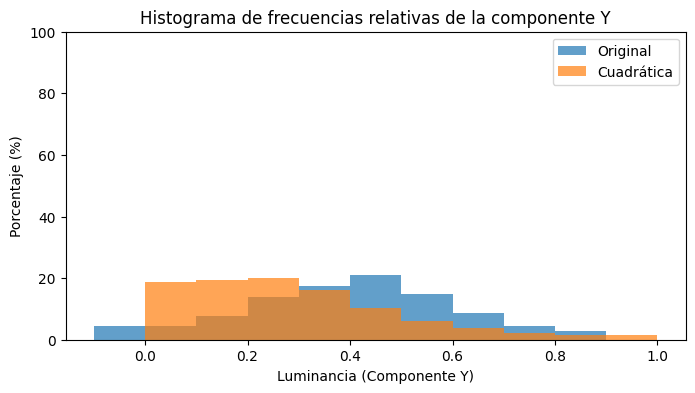

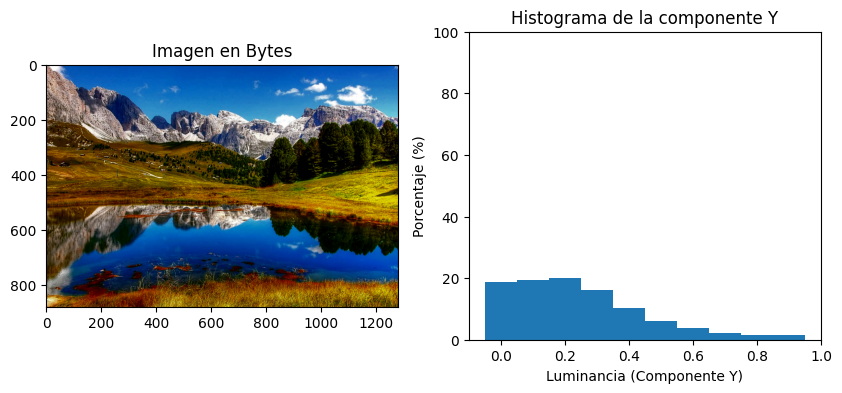

In [67]:
# prompt: aplicamos la funcion cuadratica a la imagen y mostramos la imagen resultante con su histograma una al lado de la otra

# Aplicar la función cuadrática a la componente Y
Y_cuadratica = img_yiq_norm[:, :, 0] ** 2

# Asegurarse de que los valores estén en el rango [0, 1]
Y_cuadratica = np.clip(Y_cuadratica, 0, 1)

# Reemplazar la componente Y original con la nueva componente Y_cuadratica
img_yiq_cuadratica = img_yiq_norm.copy()
img_yiq_cuadratica[:, :, 0] = Y_cuadratica

# Convertir la imagen YIQ modificada de vuelta a RGB
img_rgb_cuadratica = yiq_to_rgb(img_yiq_cuadratica)

# Mostrar la imagen original y la imagen con la función cuadrática
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_cuadratica)
plt.title('Imagen con Cuadratica en Y')

plt.show()

# Histogramas de imagen original y la imagen con función cuadrática

# Obtener la componente Y de la imagen YIQ original y la modificada
Y_original = img_yiq_norm[:, :, 0]
Y_cuadratica = img_yiq_cuadratica[:, :, 0]

# Crear los histogramas con 10 columnas para ambas imágenes
hist_original, bins_original = np.histogram(Y_original.flatten(), bins=10, range=(0, 1))
hist_cuadratica, bins_cuadratica = np.histogram(Y_cuadratica.flatten(), bins=10, range=(0, 1))

# Calcular las frecuencias relativas
freq_rel_original = hist_original / np.sum(hist_original)
freq_rel_cuadratica = hist_cuadratica / np.sum(hist_cuadratica)

# Convertir las frecuencias relativas a porcentajes
porcentaje_original = freq_rel_original * 100
porcentaje_cuadratica = freq_rel_cuadratica * 100

# Graficar el histograma en una misma línea
plt.figure(figsize=(8, 4))
plt.bar(bins_original[:-1] - 0.05, porcentaje_original, width=0.1, label='Original', alpha=0.7)
plt.bar(bins_cuadratica[:-1] + 0.05, porcentaje_cuadratica, width=0.1, label='Cuadrática', alpha=0.7)

plt.xlabel('Luminancia (Componente Y)')
plt.ylabel('Porcentaje (%)')
plt.title('Histograma de frecuencias relativas de la componente Y')
plt.legend()
plt.ylim(0, 100)  # Establecer el rango del eje Y entre 0 y 100
plt.show()

# Convertimos la imagen RGB a bytes y mostramos
img_rgb_cuadratica_bytes = img_to_bytes(img_rgb_cuadratica)

# Obtener la componente Y de la imagen YIQ modificada
Y_cuadratica = img_yiq_cuadratica[:, :, 0]

# Crear el histograma con 10 columnas para la imagen modificada
hist_cuadratica, bins_cuadratica = np.histogram(Y_cuadratica.flatten(), bins=10, range=(0, 1))

# Calcular las frecuencias relativas
freq_rel_cuadratica = hist_cuadratica / np.sum(hist_cuadratica)

# Convertir las frecuencias relativas a porcentajes
porcentaje_cuadratica = freq_rel_cuadratica * 100


# Mostrar la imagen en bytes y su histograma lado a lado
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

# Mostrar la imagen desde los bytes
image = Image.open(io.BytesIO(img_rgb_cuadratica_bytes))
plt.imshow(image)
plt.title('Imagen en Bytes')

plt.subplot(1, 2, 2)
plt.bar(bins_cuadratica[:-1], porcentaje_cuadratica, width=1/10)
plt.xlabel('Luminancia (Componente Y)')
plt.ylabel('Porcentaje (%)')
plt.title('Histograma de la componente Y')
plt.ylim(0, 100)  # Establecer el rango del eje Y entre 0 y 100
plt.show()


Funcion lineal a trozos

In [68]:

def lineal_a_trozos(img_yiq, umbral_bajo=0.2, umbral_alto=0.8, pendiente_baja=0.5, pendiente_alta=0.5):
  """Aplica una función lineal a trozos a la componente Y de una imagen YIQ.

  Args:
    img_yiq: La imagen en el espacio de color YIQ.
    umbral_bajo: El valor de umbral inferior para la función lineal.
    umbral_alto: El valor de umbral superior para la función lineal.
    pendiente_baja: La pendiente de la función lineal en la zona inferior.
    pendiente_alta: La pendiente de la función lineal en la zona superior.

  Returns:
    Una nueva imagen YIQ con la componente Y modificada.
  """
  Y = img_yiq[:, :, 0]
  Y_modificada = Y.copy()

  # Aplicar la función lineal a trozos
  Y_modificada[Y < umbral_bajo] = Y[Y < umbral_bajo] * pendiente_baja
  Y_modificada[Y > umbral_alto] = umbral_alto + (Y[Y > umbral_alto] - umbral_alto) * pendiente_alta
  Y_modificada = np.clip(Y_modificada, 0, 1)

  # Actualizar la componente Y de la imagen
  img_yiq_modificada = img_yiq.copy()
  img_yiq_modificada[:, :, 0] = Y_modificada

  return img_yiq_modificada


Proceso de la imagen original a una con una funcion a trozos. Histogramas de las imagenes

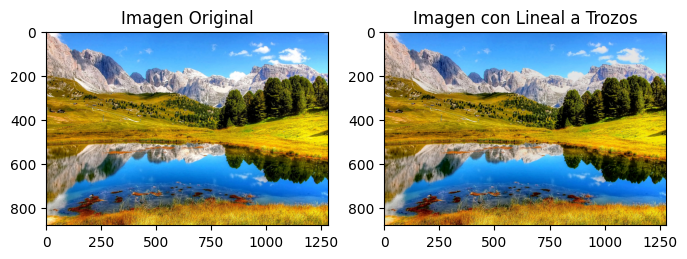

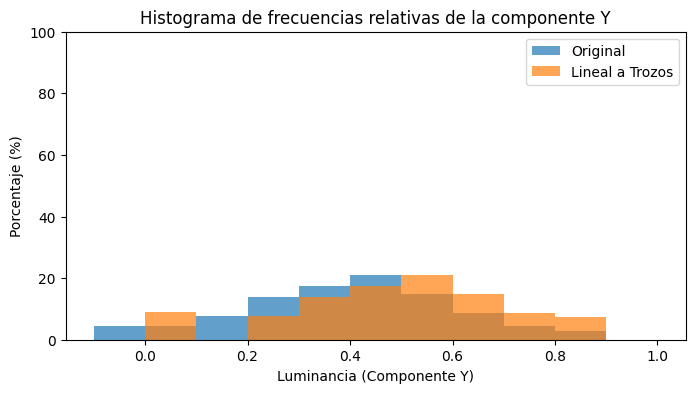

In [69]:

# Aplicamos la función lineal a trozos a la imagen original
img_yiq_lineal = lineal_a_trozos(img_yiq)
img_rgb_lineal = yiq_to_rgb(img_yiq_lineal)


# Mostrar la imagen original y la imagen procesada
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_lineal)
plt.title('Imagen con Lineal a Trozos')

plt.show()

# Histogramas de imagen original y la imagen con función lineal a trozos
Y_original = img_yiq[:, :, 0]
Y_lineal = img_yiq_lineal[:, :, 0]

hist_original, bins_original = np.histogram(Y_original.flatten(), bins=10, range=(0, 1))
hist_lineal, bins_lineal = np.histogram(Y_lineal.flatten(), bins=10, range=(0, 1))

freq_rel_original = hist_original / np.sum(hist_original)
freq_rel_lineal = hist_lineal / np.sum(hist_lineal)

porcentaje_original = freq_rel_original * 100
porcentaje_lineal = freq_rel_lineal * 100

plt.figure(figsize=(8, 4))
plt.bar(bins_original[:-1] - 0.05, porcentaje_original, width=0.1, label='Original', alpha=0.7)
plt.bar(bins_lineal[:-1] + 0.05, porcentaje_lineal, width=0.1, label='Lineal a Trozos', alpha=0.7)

plt.xlabel('Luminancia (Componente Y)')
plt.ylabel('Porcentaje (%)')
plt.title('Histograma de frecuencias relativas de la componente Y')
plt.legend()
plt.ylim(0, 100)
plt.show()
